<h1 align="center">Estado y mediciones en sistema con una partícula cuyo espín es 1/2 y pertenece a un espacio de Hilbert de dimensión dos</h1>
<div align="right">David A. Miranda, PhD<br>2023</div>

## 1. Cargar librería

In [1]:
import numpy as np
from sympy import Matrix, init_printing, re, im, nsimplify, arg, exp
from IPython.display import display, Markdown
from scipy.constants import hbar
init_printing()

## 2. Planteamiento del problema

Sea un sistema con espín $\frac{1}{2}$ cuyo hamiltoniano está dado por $\hat{H} = 5\pi\hbar \times 10^{10} \vert 1 \rangle \langle 1 \vert$, en unidades SI, donde $\vert 0 \rangle$  y $\vert 1 \rangle$  son los vectores propios de $\hat{H}$.  Dado el observable $\hat{A}$, responda las siguientes preguntas, suponiendo que en el tiempo $t=0 ps$ el estado del sistema es |1⟩.

$$\hat{A}_1 = \hat{S}_x = \vert 0 \rangle \langle 1 \vert + \vert 1 \rangle \langle 0 \vert$$

$$\hat{A}_2 = \hat{S}_y = -i \vert 0 \rangle \langle 1 \vert + i \vert 1 \rangle \langle 0 \vert $$

$$\hat{A}_3 = 3 \vert 0 \rangle \langle 0 \vert + \vert 0 \rangle \langle 1 \vert + \vert 1 \rangle \langle 0 \vert + 3 \vert 1 \rangle \langle 1 \vert $$

$$ \hat{A}_4 = 3 \vert 0 \rangle \langle 0 \vert + i \vert 0 \rangle \langle 1 \vert - i \vert 1 \rangle \langle 0 \vert + 3 \vert 1 \rangle \langle 1 \vert $$

**(a)** Para $t=0 ps$, calcule las probabilidades que el sistema se encuentre en cada uno de los vectores propios del observable $\hat{A}$ y el hamiltoniano.

**(b)** Suponga que la última medición del observable $\hat{A}$ se realizó en  $t=10 ps$. Para el tiempo $t=10 ps$  obtenga el vector de estado del sistema y calcule las probabilidades que el sistema se encuentre en cada uno de los vectores propios del observable $\hat{A}$ y el hamiltoniano.

**(c)** Suponga que la última medición del observable $\hat{A}$ se realizó en  $t=10 ps$. Para el tiempo $t=20 ps$  obtenga el vector de estado del sistema y calcule las probabilidades que el sistema se encuentre en cada uno de los vectores propios del observable $\hat{A}$ y el hamiltoniano.

**(d)** Suponga que la última medición del observable $\hat{A}$ se realizó en  $t=20 ps$. Para el tiempo $t=20 ps$  obtenga el vector de estado del sistema y calcule las probabilidades que el sistema se encuentre en cada uno de los vectores propios del observable $\hat{A}$ y el hamiltoniano.

**(e)** Suponga que la última medición del observable $\hat{A}$ se realizó en  $t=20 ps$. Para el tiempo $t=40 ps$  obtenga el vector de estado del sistema y calcule las probabilidades que el sistema se encuentre en cada uno de los vectores propios del observable $\hat{A}$ y el hamiltoniano.

## 3. Métodos y definiciones

In [2]:
t = 0
E0 = 0
E1 = 5 * np.pi * 1e10 * hbar
Sx = Matrix([[0, 1], [1, 0]])
Sy = Matrix([[0, -1j], [1j, 0]])
Sz = Matrix([[1, 0], [0, -1]])
A3 = Matrix([[3, 1], [1, 3]])
A4 = Matrix([[3, 1j], [-1j, 3]])
H = Matrix([[E0, 0], [0, E1]])

In [3]:
def in_bloch_sphere(𝛙):
    φ = arg(𝛙[0])
    if not φ.is_finite:
        φ = 0
    𝛙0 = nsimplify( 𝛙[0] * exp(-1j*φ) )
    𝛙1 = nsimplify( 𝛙[1] * exp(-1j*φ) )
    return Matrix([𝛙0, 𝛙1])

In [4]:
def print_state_vector(𝛙, vector_name='a_0', additional_string=''):
    x = in_bloch_sphere(𝛙)
    x0 = x[0]; x1 = x[1]
    s = '+' if float(im(x1)) >= 0 else ''
    xy = fr'${float(re(x1))}{s}{float(im(x1))} i$'
    display(Markdown(fr'$|{vector_name}\rangle = {x0} |0\rangle$ + ( {xy} )$|1\rangle$ {additional_string}'))
    return Matrix([x0, x1])

In [5]:
def temporal_evolution(𝛙, Δt):
    global t
    t += Δt
    φ = E1 * Δt * 1e-12 / hbar
    return Matrix([𝛙[0], 𝛙[1] * exp(1j*φ)])

In [6]:
def get_eigen(A, vector_name='a'):
    a0v0, a1v1 = A.eigenvects()
    a0, _, v0 = a0v0; v0 = v0[0]/v0[0].norm()
    a1, _, v1 = a1v1; v1 = v1[0]/v1[0].norm()
    if a0 > a1 or a0 < 0:
        aux = a0; a0 = a1; a1 = aux
        aux = v0; v0 = v1; v1 = aux
    v0 = print_state_vector(v0, vector_name=f'{vector_name}_0', additional_string=fr', ${vector_name}_0 = {a0}$')
    v1 = print_state_vector(v1, vector_name=f'{vector_name}_1', additional_string=fr', ${vector_name}_1 = {a1}$')
    return a0, v0, a1, v1

In [7]:
def probability(𝛙, a, vector_name='a', verbose=True):
    amplitude = a.dot(𝛙)
    p = float(amplitude * amplitude.conjugate())
    if verbose:
        display(Markdown(fr'$|\langle {vector_name} | \psi \rangle|^2 = {p}$'))
    return p

In [8]:
def measure(𝛙, x0, x1):
    p = probability(𝛙, x1, verbose=False)
    if np.random.binomial(1, p, size=1) == 0:
        return x0
    return x1

## 4. Qubit, mediciones y evolución temporal

### 4.1. Obtención de vectores propios

### Observable =

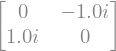

$|a_0\rangle = sqrt(2)/2 |0\rangle$ + ( $0.0+0.7071067811865476 i$ )$|1\rangle$ , $a_0 = 1.00000000000000$

$|a_1\rangle = sqrt(2)/2 |0\rangle$ + ( $0.0-0.7071067811865476 i$ )$|1\rangle$ , $a_1 = -1.00000000000000$

$|E_0\rangle = 1 |0\rangle$ + ( $0.0+0.0 i$ )$|1\rangle$ , $E_0 = 0$

$|E_1\rangle = 0 |0\rangle$ + ( $1.0+0.0 i$ )$|1\rangle$ , $E_1 = 1.65651753750000E-23$

In [9]:
A = Sy
display(Markdown(f'### Observable ='), A)
a0, v0, a1, v1 = get_eigen(A, vector_name='a')
E0, q0, E1, q1 = get_eigen(H, vector_name='E')

### 4.2. Proceso, evolución temporal y mediciones

**(a)** $t = 0$ ps, $|\psi(t=0)\rangle = |1\rangle$

In [10]:
𝛙 = Matrix([0, 1])
𝛙 = print_state_vector(𝛙, vector_name='\psi(t=0)', additional_string='')
_ = probability(𝛙, v0, vector_name='a_0')
_ = probability(𝛙, v1, vector_name='a_1')
_ = probability(𝛙, q0, vector_name='E_0')
_ = probability(𝛙, q1, vector_name='E_1')

$|\psi(t=0)\rangle = 0 |0\rangle$ + ( $1.0+0.0 i$ )$|1\rangle$ 

$|\langle a_0 | \psi \rangle|^2 = 0.5$

$|\langle a_1 | \psi \rangle|^2 = 0.5$

$|\langle E_0 | \psi \rangle|^2 = 0.0$

$|\langle E_1 | \psi \rangle|^2 = 1.0$

**(b)** $\Delta t = 10$ ps

In [11]:
𝛙 = temporal_evolution(𝛙, 10)
𝛙 = measure(𝛙, v0, v1)
𝛙 = print_state_vector(𝛙, vector_name=f'\psi(t={t} ps)', additional_string='')
_ = probability(𝛙, v0, vector_name='a_0')
_ = probability(𝛙, v1, vector_name='a_1')
_ = probability(𝛙, q0, vector_name='E_0')
_ = probability(𝛙, q1, vector_name='E_1')

$|\psi(t=10 ps)\rangle = sqrt(2)/2 |0\rangle$ + ( $0.0+0.7071067811865476 i$ )$|1\rangle$ 

$|\langle a_0 | \psi \rangle|^2 = 0.0$

$|\langle a_1 | \psi \rangle|^2 = 1.0$

$|\langle E_0 | \psi \rangle|^2 = 0.5$

$|\langle E_1 | \psi \rangle|^2 = 0.5$

**(c)** $\Delta t = 10 ps$

In [12]:
𝛙 = temporal_evolution(𝛙, 10)
𝛙 = print_state_vector(𝛙, vector_name=f'\psi(t={t} ps)', additional_string='')
_ = probability(𝛙, v0, vector_name='a_0')
_ = probability(𝛙, v1, vector_name='a_1')
_ = probability(𝛙, q0, vector_name='E_0')
_ = probability(𝛙, q1, vector_name='E_1')

$|\psi(t=20 ps)\rangle = sqrt(2)/2 |0\rangle$ + ( $-0.7071067811865476-2.3905644580549233e-15 i$ )$|1\rangle$ 

$|\langle a_0 | \psi \rangle|^2 = 0.5000000000000017$

$|\langle a_1 | \psi \rangle|^2 = 0.49999999999999833$

$|\langle E_0 | \psi \rangle|^2 = 0.5$

$|\langle E_1 | \psi \rangle|^2 = 0.5$

**(d)** $\Delta t = 0 ps$

In [13]:
𝛙 = measure(𝛙, v0, v1)
𝛙 = print_state_vector(𝛙, vector_name=f'\psi(t={t} ps)', additional_string='')
_ = probability(𝛙, v0, vector_name='a_0')
_ = probability(𝛙, v1, vector_name='a_1')
_ = probability(𝛙, q0, vector_name='E_0')
_ = probability(𝛙, q1, vector_name='E_1')

$|\psi(t=20 ps)\rangle = sqrt(2)/2 |0\rangle$ + ( $0.0-0.7071067811865476 i$ )$|1\rangle$ 

$|\langle a_0 | \psi \rangle|^2 = 1.0$

$|\langle a_1 | \psi \rangle|^2 = 0.0$

$|\langle E_0 | \psi \rangle|^2 = 0.5$

$|\langle E_1 | \psi \rangle|^2 = 0.5$

**(e)** $\Delta t = 20 ps$

In [14]:
𝛙 = temporal_evolution(𝛙, 20)
𝛙 = print_state_vector(𝛙, vector_name=f'\psi(t={t} ps)', additional_string='')
_ = probability(𝛙, v0, vector_name='a_0')
_ = probability(𝛙, v1, vector_name='a_1')
_ = probability(𝛙, q0, vector_name='E_0')
_ = probability(𝛙, q1, vector_name='E_1')

$|\psi(t=40 ps)\rangle = sqrt(2)/2 |0\rangle$ + ( $2.289938895755629e-15+0.7071067811865476 i$ )$|1\rangle$ 

$|\langle a_0 | \psi \rangle|^2 = 2.6219100731472545e-30$

$|\langle a_1 | \psi \rangle|^2 = 1.0$

$|\langle E_0 | \psi \rangle|^2 = 0.5$

$|\langle E_1 | \psi \rangle|^2 = 0.5$

## 5. Preguntas de autoexplicación

### 5.1. Primer bloque de preguntas

5.1.1. Describa el problema resuelto en este *Worked Example*.

5.1.2. Realice un esquema del proceso implícito en las preguntas resueltas en este *Worked Example*.

5.1.3. ¿Cómo se obtiene la representación matricial, así como los vectores y valores propios de cada uno de los operadores?

5.1.4. ¿Qué diferencia existe en primero medir y luego estimar las probabilidades a realizar el proceso al reves, es decir, estimar las probabilidades y luego medir?

5.1.5. Explique cómo se aplica cada uno de los postulados de la mecánica cuántica en este *Worked Example*.

### 5.2. Segundo bloque de preguntas

5.2.1. Explique el propósito del método *in_block_sphere*.

5.2.2. Explique el propósito del método *print_state_vector*.

5.2.3. Deduzca las expresiones usadas en *temporal_evolution* para obtener la evolución temporal y explique su implementación.

5.2.4. Calcule a mano los valores y vectores propios del operador $\hat{A}$. Compare su respuesta con la obtenida con el método *get_eigen* e interprete las similitudes y diferencias.

5.2.5. Explique como se obtiene la probabilidad con el método *probability* y cómo se realiza el proceso de medición con *measure*. Argumente su respuesta.

### 5.3. Tercer bloque de preguntas

5.3.1. Calcule a mano las probabilidades del ítem **(a)** y compare el resultado con el obtenido en este *Worked Example*.

5.3.2. Calcule a mano las probabilidades del ítem **(b)** y compare el resultado con el obtenido en este *Worked Example*.

5.3.3. Calcule a mano las probabilidades del ítem **(c)** y compare el resultado con el obtenido en este *Worked Example*.

5.3.4. Calcule a mano las probabilidades del ítem **(d)** y compare el resultado con el obtenido en este *Worked Example*.

5.3.5. Calcule a mano las probabilidades del ítem **(e)** y compare el resultado con el obtenido en este *Worked Example*.

End!